In [1]:
# 假設你的檔案叫 "your_file.txt"
with open("data/full_text_no_abstract_ids.txt", "r", encoding="utf-8") as f:
    all_ids = [line.strip() for line in f]


In [2]:
len(all_ids)

652582

In [3]:
import pandas as pd
df = pd.DataFrame(all_ids, columns=["ids"])
df

,ids
0,1279164
1,1279522
2,1279851
3,1280811
4,1280812
...,...
652577,40123982
652578,40123983
652579,40124147
652580,40124349


In [4]:
import pandas as pd

df2 = pd.read_csv('data/binary_data.csv')
df2

,ids,autobiography,bibliography,biography,case-control_studies,case_reports,clinical_conference,clinical_studies_as_topic,clinical_study,clinical_trial,...,retraction_of_publication,retrospective_studies,review,scientific_integrity_review,systematic_review,systematic_reviews_as_topic,twin_study,validation_study,veterinary_clinical_trial,veterinary_randomized_controlled_trial
0,9868216,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,1
1,9358420,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,1
2,10553438,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,1
3,31785634,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
4,28538805,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9572361,9474670,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9572362,23685058,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9572363,18985570,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9572364,15682490,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df['ids'] = df['ids'].astype(int)

In [6]:
merged_df = pd.merge(df, df2, how='inner', left_on='ids', right_on='ids')
merged_df

,ids,autobiography,bibliography,biography,case-control_studies,case_reports,clinical_conference,clinical_studies_as_topic,clinical_study,clinical_trial,...,retraction_of_publication,retrospective_studies,review,scientific_integrity_review,systematic_review,systematic_reviews_as_topic,twin_study,validation_study,veterinary_clinical_trial,veterinary_randomized_controlled_trial
0,1281038,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1281440,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1281569,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1281570,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1281627,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330006,39816855,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
330007,39816886,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
330008,39817284,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
330009,39823069,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
merged_df.to_csv('data/merged_df_without.csv', index=False)

In [6]:
import pandas as pd
merged_df = pd.read_csv('data/merged_df_without.csv')

/tmp/ipykernel_1350881/1184252766.py:2: DtypeWarning: Columns (62) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df = pd.read_csv('data/merged_df_without.csv')


In [2]:
import requests
import re
import pandas as pd
from tqdm import tqdm

def fetch_dcom_bulk(pmids, chunk_size=200):
    """
    接收一個含 PubMed ID 的串列，將它們分批（每批最多 chunk_size 筆）呼叫 API。
    回傳一個 dict：{ pmid字串: dcom字串或None }
    """
    results = {}

    # 將所有pmids分塊，最多每塊200筆
    for i in tqdm(range(0, len(pmids), chunk_size)):
        chunk = pmids[i:i + chunk_size]
        # 用逗號把所有pmid串起來
        chunk_str = ",".join(str(p) for p in chunk)

        # 準備 API URL
        url = (
            "https://api.ncbi.nlm.nih.gov/lit/ctxp/v1/pubmed/"
            f"?format=medline&id={chunk_str}"
        )
        
        # 呼叫 API
        resp = requests.get(url, timeout=10)
        resp.raise_for_status()
        text = resp.text.strip()
        
        # 解析取得的 MEDLINE 文字：
        # 一般可用空行(\n\n)來分割不同文獻
        records = re.split(r'\n\s*\n', text)
        
        for record in records:
            # 擷取 PMID
            pmid_match = re.search(r"^PMID\s*-\s*(\d+)", record, re.MULTILINE)
            # 擷取 DCOM
            dcom_match = re.search(r"^DP\s*-\s*(\S+)", record, re.MULTILINE)
            
            if pmid_match:
                pmid_val = pmid_match.group(1)
                # 若沒找到 DCOM，則是 None
                dcom_val = dcom_match.group(1) if dcom_match else None
                results[pmid_val] = dcom_val
    
    return results

# === 使用範例 ===

# 假設這是你的 DataFrame，裡面有一欄 'ids' 放了 PMID
# df = pd.DataFrame({'ids': [9868216, 28377901, 10553438, ...]})

# 先整理出所有 PMID 的列表
pmid_list = merged_df['ids'].tolist()

# 一次向 API 批次抓取，回傳一個字典 { '9868216': '19991213', ... }
dcom_dict = fetch_dcom_bulk(pmid_list, chunk_size=200)

# 將結果回填到 DataFrame 的新欄位 'dcom'
# 注意：dcom_dict 的 key、df['ids'] 都要同樣類型才對得上
# 若 df['ids'] 是int，則可先轉成 str 來比對
merged_df['dp'] = merged_df['ids'].astype(str).map(dcom_dict)


merged_df

100%|██████████| 1651/1651 [17:18<00:00,  1.59it/s]


,ids,autobiography,bibliography,biography,case-control_studies,case_reports,clinical_conference,clinical_studies_as_topic,clinical_study,clinical_trial,...,retrospective_studies,review,scientific_integrity_review,systematic_review,systematic_reviews_as_topic,twin_study,validation_study,veterinary_clinical_trial,veterinary_randomized_controlled_trial,dp
0,1281038,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1992
1,1281440,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1992
2,1281569,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1992
3,1281570,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1992
4,1281627,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330006,39816855,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2023
330007,39816886,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2023
330008,39817284,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2022
330009,39823069,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2024


In [3]:
dp_counts = merged_df['dp'].value_counts()
dp_counts.to_csv("data/dp_counts_b.csv", header=["count"])


In [5]:
merged_df

,ids,autobiography,bibliography,biography,case-control_studies,case_reports,clinical_conference,clinical_studies_as_topic,clinical_study,clinical_trial,...,retrospective_studies,review,scientific_integrity_review,systematic_review,systematic_reviews_as_topic,twin_study,validation_study,veterinary_clinical_trial,veterinary_randomized_controlled_trial,dp
0,1281038,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1992
1,1281440,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1992
2,1281569,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1992
3,1281570,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1992
4,1281627,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330006,39816855,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2023
330007,39816886,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2023
330008,39817284,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2022
330009,39823069,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2024


每個 label 出現的次數：
letter: 89692
editorial: 84783
comment: 61979
case_reports: 50644
published_erratum: 41410
review: 27679
news: 16438
historical_article: 11431
biography: 6973
clinical_studies_as_topic: 6127
clinical_trials_as_topic: 6054
practice_guidelines_as_topic: 3863
portrait: 2857
congress: 2780
predictive_value_of_tests: 1598
follow-up_studies: 1146
interview: 1048
personal_narrative: 977
expression_of_concern: 943
retrospective_studies: 914
clinical_study: 900
practice_guideline: 795
clinical_trial: 742
prospective_studies: 577
cohort_studies: 544
evaluation_study: 534
meta-analysis_as_topic: 531
randomized_controlled_trial_humans: 454
reproducibility_of_results: 415
multicenter_study: 383
evaluation_studies_as_topic: 377
genome-wide_association_study: 372
cross-sectional_studies: 370
meta-analysis: 341
double-blind_method: 335
human_experimentation: 332
autobiography: 307
scientific_integrity_review: 273
case-control_studies: 268
lecture: 241
interviews_as_topic: 234
consensus

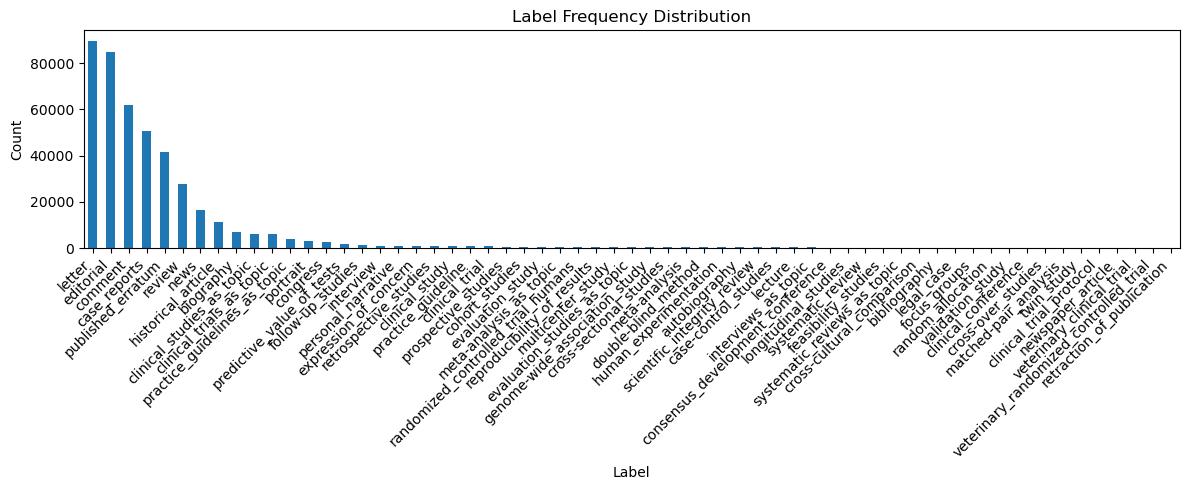

count    330011.000000
mean          1.304517
std           0.595830
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           7.000000
Name: num_labels, dtype: float64


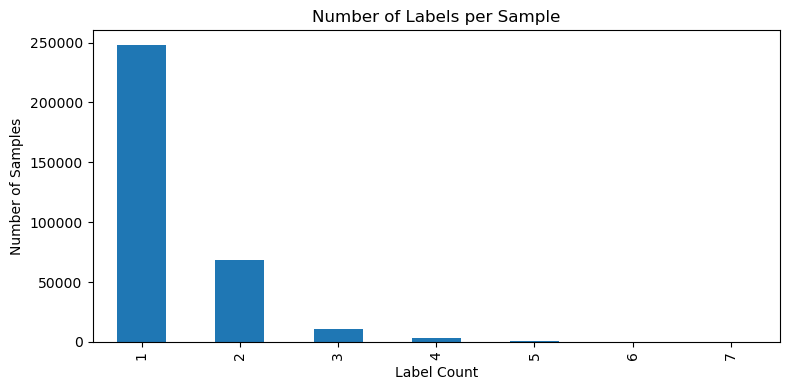

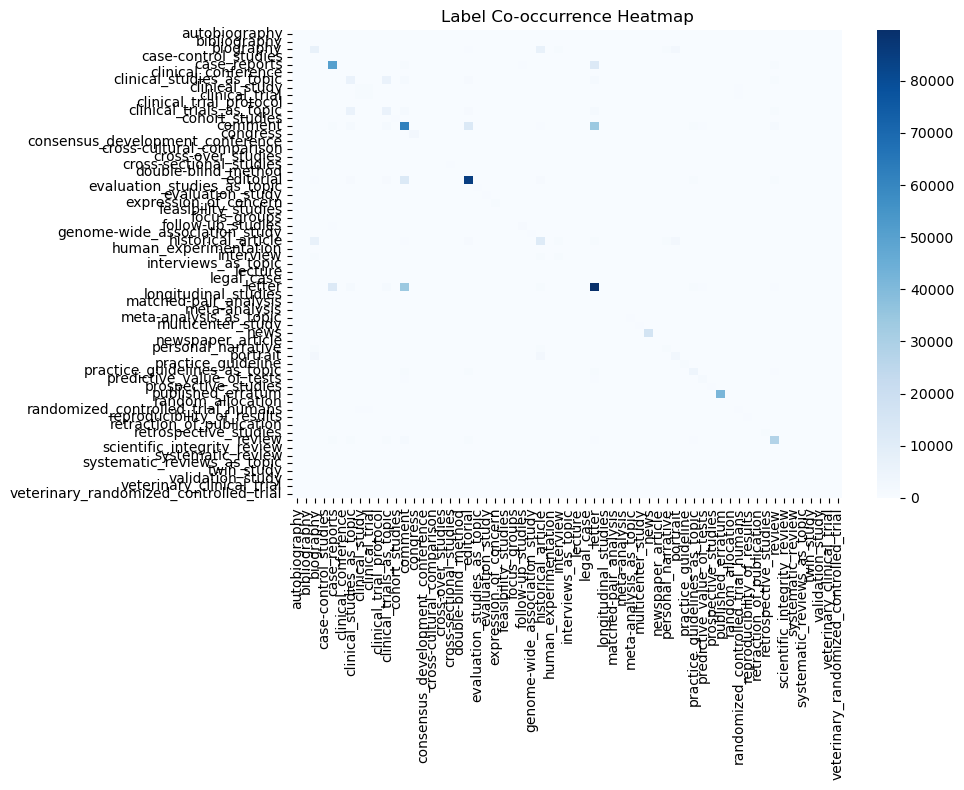

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 假設第一欄是 ids，剩下的是 one-hot labels
label_cols = merged_df.columns[1:]  # 你可以調整這個 index，如果 label 欄位不是從第 1 欄開始

# === Step 2: 計算每個 label 的出現次數 ===
label_counts = merged_df[label_cols].sum().sort_values(ascending=False)

# 顯示結果
print("每個 label 出現的次數：")
for index, value in label_counts.items():
    print(f"{index}: {value}")

# === Step 3: 視覺化 label 分布 ===
plt.figure(figsize=(12, 5))
label_counts.plot(kind='bar')
plt.title("Label Frequency Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# === Step 4: 每筆資料擁有幾個 label ===
merged_df['num_labels'] = merged_df[label_cols].sum(axis=1)

# 顯示基本統計
print(merged_df['num_labels'].describe())

# 視覺化
plt.figure(figsize=(8, 4))
merged_df['num_labels'].value_counts().sort_index().plot(kind='bar')
plt.title("Number of Labels per Sample")
plt.xlabel("Label Count")
plt.ylabel("Number of Samples")
plt.tight_layout()
plt.show()

# === Step 5: Label Co-occurrence Matrix (可選) ===
co_occur = merged_df[label_cols].T.dot(merged_df[label_cols])
plt.figure(figsize=(10, 8))
sns.heatmap(co_occur, cmap='Blues', xticklabels=True, yticklabels=True)
plt.title("Label Co-occurrence Heatmap")
plt.tight_layout()
plt.show()


In [9]:
label_counts.sort_index().to_csv("data/label_counts_b.csv", header=["count"])
